In [15]:
"""
# Life Cycle Analysis (LCA) Tool Example

This script demonstrates the functionality of the LCA tool for analyzing environmental impacts 
of products throughout their life cycle.
"""

'\n# Life Cycle Analysis (LCA) Tool Example\n\nThis script demonstrates the functionality of the LCA tool for analyzing environmental impacts \nof products throughout their life cycle.\n'

## 1. Setup and Data Loading

First, let's import the necessary modules and load our data.

In [16]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
from src.data_input import DataInput
from src.calculations import LCACalculator
from src.visualization import LCAVisualizer

### Load Product Data
Load the sample product data from CSV file.

In [17]:
# Initialize data input handler
data_input = DataInput()

# Load product data
product_data = data_input.read_data('../data-raw/sample_data.csv')
print("Product Data Shape:", product_data.shape)
product_data.head()

Product Data Shape: (60, 14)


,product_id,product_name,life_cycle_stage,material_type,quantity_kg,energy_consumption_kwh,transport_distance_km,transport_mode,waste_generated_kg,recycling_rate,landfill_rate,incineration_rate,carbon_footprint_kg_co2e,water_usage_liters
0,P001,Reinforced Concrete,Manufacturing,Concrete,2500.0,120.0,50,Truck,125.0,0.1,0.80,0.10,350.0,150.0
1,P001,Reinforced Concrete,Transportation,Concrete,2500.0,20.0,100,Truck,0.0,0.0,0.00,0.00,75.0,0.0
2,P001,Reinforced Concrete,End-of-Life,Concrete,2500.0,50.0,30,Truck,2500.0,0.1,0.80,0.10,200.0,50.0
3,P002,Structural Steel Beam,Manufacturing,Steel,500.0,300.0,200,Truck,25.0,0.9,0.05,0.05,450.0,200.0
4,P002,Structural Steel Beam,Transportation,Steel,500.0,40.0,150,Truck,0.0,0.0,0.00,0.00,100.0,0.0


### Load Impact Factors
Load the environmental impact factors from JSON file.

In [18]:
# Load impact factors
impact_factors = data_input.read_impact_factors('../data-raw/impact_factors.json')
print("Available Materials:", list(impact_factors.keys()))
print("\nImpact Factors for Steel:")
pd.DataFrame(impact_factors['steel'])

Available Materials: ['steel', 'aluminum', 'plastic', 'paper', 'concrete', 'wood', 'clay', 'glass', 'copper', 'mineral_wool', 'cement']

Impact Factors for Steel:


,manufacturing,transportation,disposal
carbon_impact,1.8,0.5,0.1
carbon_unit,kg CO2e,kg CO2e,kg CO2e
energy_impact,20,5,1
energy_unit,MJ,MJ,MJ
water_impact,150,30,10
water_unit,L,L,L


## 2. Impact Calculations

Calculate environmental impacts using the LCACalculator.

In [19]:
# Initialize calculator
calculator = LCACalculator(impact_factors_path='../data-raw/impact_factors.json')

# Calculate impacts
impacts = calculator.calculate_impacts(product_data)
print("Calculated Impacts Shape:", impacts.shape)
impacts.head()

Calculated Impacts Shape: (60, 14)


,product_id,product_name,life_cycle_stage,material_type,quantity_kg,energy_consumption_kwh,transport_distance_km,waste_generated_kg,carbon_impact,energy_impact,water_impact,recycling_rate,landfill_rate,incineration_rate
0,P001,Reinforced Concrete,manufacturing,concrete,2500.0,120.0,50,125.0,700.0,3870.0,150150.0,0.1,0.80,0.10
1,P001,Reinforced Concrete,transportation,concrete,2500.0,20.0,100,0.0,150.0,770.0,0.0,0.0,0.00,0.00
2,P001,Reinforced Concrete,end-of-life,concrete,2500.0,50.0,30,2500.0,200.0,50.0,50.0,0.1,0.80,0.10
3,P002,Structural Steel Beam,manufacturing,steel,500.0,300.0,200,25.0,1350.0,10300.0,75200.0,0.9,0.05,0.05
4,P002,Structural Steel Beam,transportation,steel,500.0,40.0,150,0.0,350.0,2540.0,15000.0,0.0,0.00,0.00


### Calculate Total Impacts
Aggregate impacts by product.

In [20]:
# Calculate total impacts
total_impacts = calculator.calculate_total_impacts(impacts)
print("Total Impacts by Product:")
total_impacts

Total Impacts by Product:


,product_id,product_name,carbon_impact,energy_impact,water_impact,waste_generated_kg
0,P001,Reinforced Concrete,1050.0,4690.0,150200.0,2625.00
1,P002,Structural Steel Beam,1850.0,12870.0,90230.0,525.00
2,P003,Engineered Wood Beam,300.0,1205.0,8100.0,105.00
3,P004,Clay Brick,11.0,72.0,112.0,2.75
4,P005,Glass Panel,800.0,3850.0,10115.0,52.50
5,P006,Copper Wire,540.0,2585.0,5060.0,10.50
6,P007,Aluminum Cladding,432.0,845.0,4872.0,21.00
7,P008,Insulation Board,225.0,125.0,48.0,15.75
8,P009,Plastic Pipe,175.0,95.0,35.0,5.25
9,P010,Cement Block,158.0,408.0,2530.0,21.00


## 3. Visualization

Create various visualizations using the LCAVisualizer.

### Impact Breakdown by Material Type

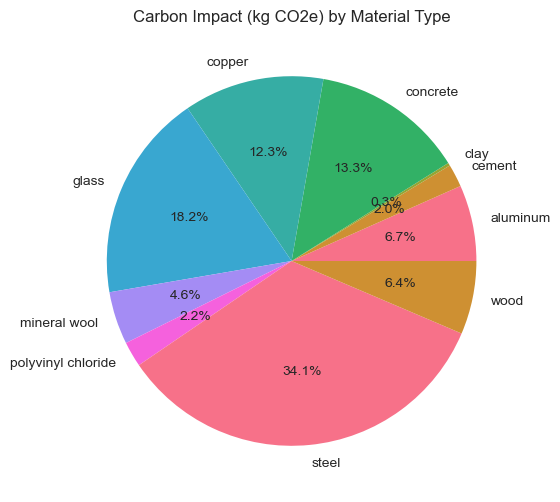

In [21]:
visualizer = LCAVisualizer()

# Plot carbon impact breakdown by material type
fig = visualizer.plot_impact_breakdown(impacts, 'carbon_impact', 'material_type')
plt.show()

### Life Cycle Impacts for a Specific Product

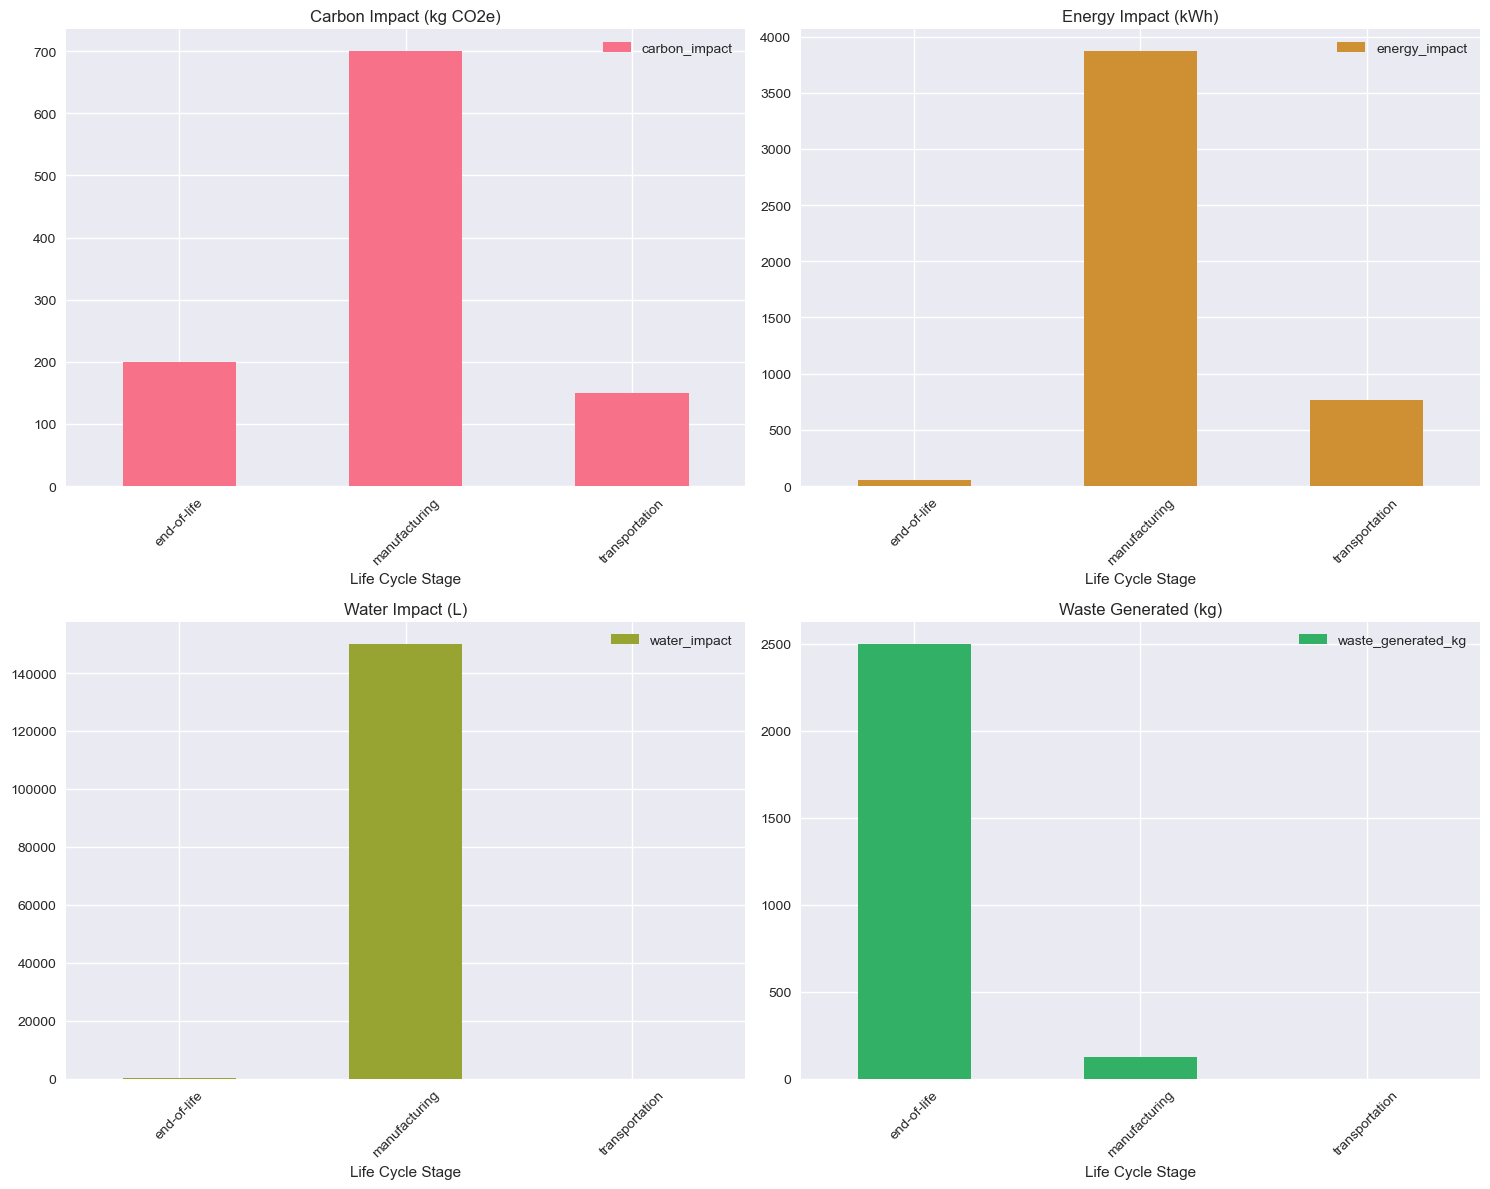

In [22]:
# Plot life cycle impacts for Product1
fig = visualizer.plot_life_cycle_impacts(impacts, 'P001')
plt.show()

### Product Comparison

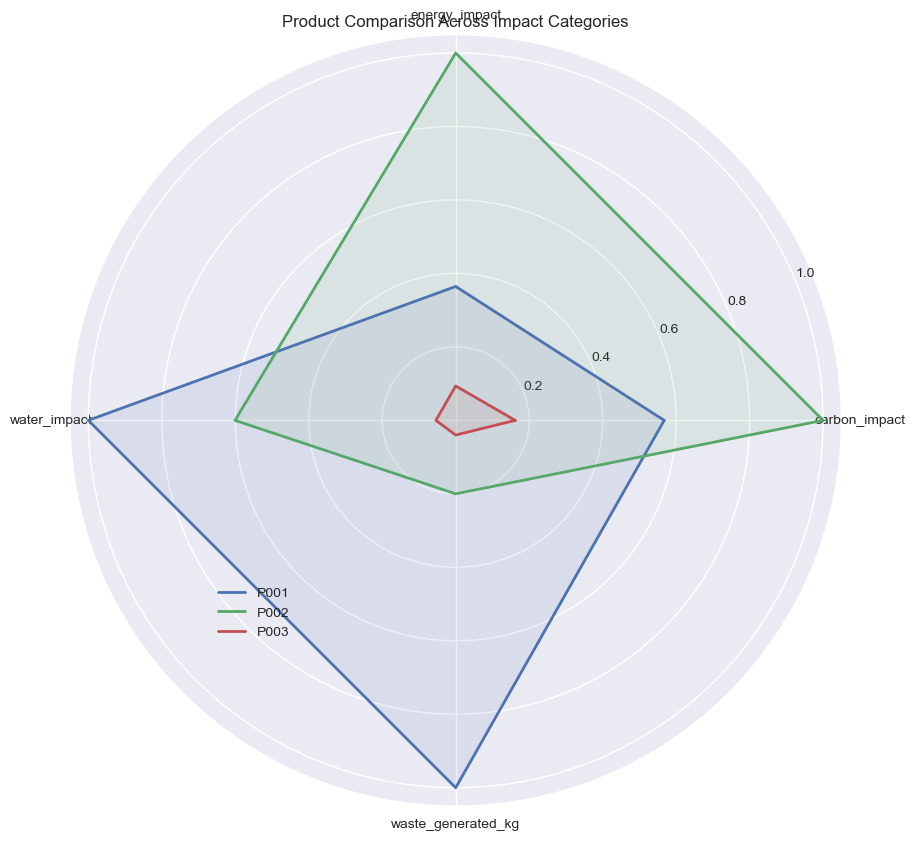

In [38]:
# Compare two products
fig = visualizer.plot_product_comparison(impacts, ['P001', 'P002','P003'])
plt.show()

### End-of-Life Management

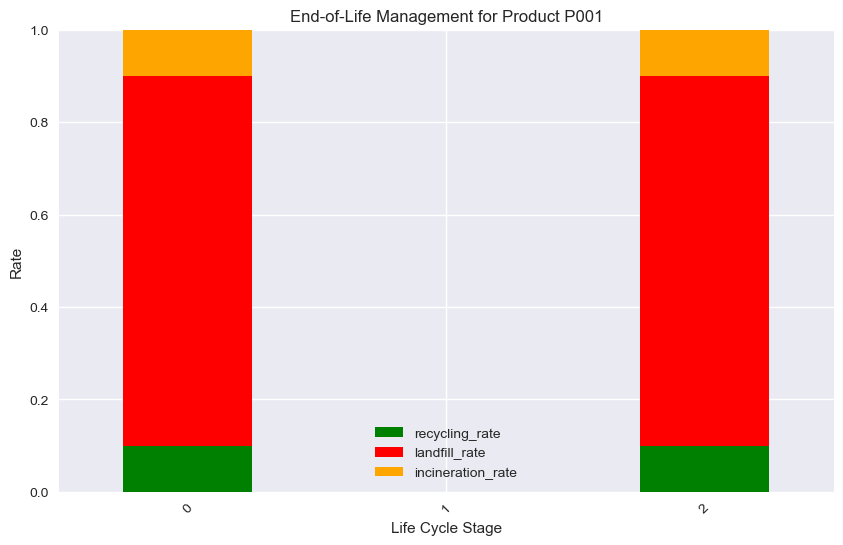

In [ ]:
# Plot end-of-life breakdown for Product1
fig = visualizer.plot_end_of_life_breakdown(impacts, 'P001')
plt.show()

### Impact Category Correlations

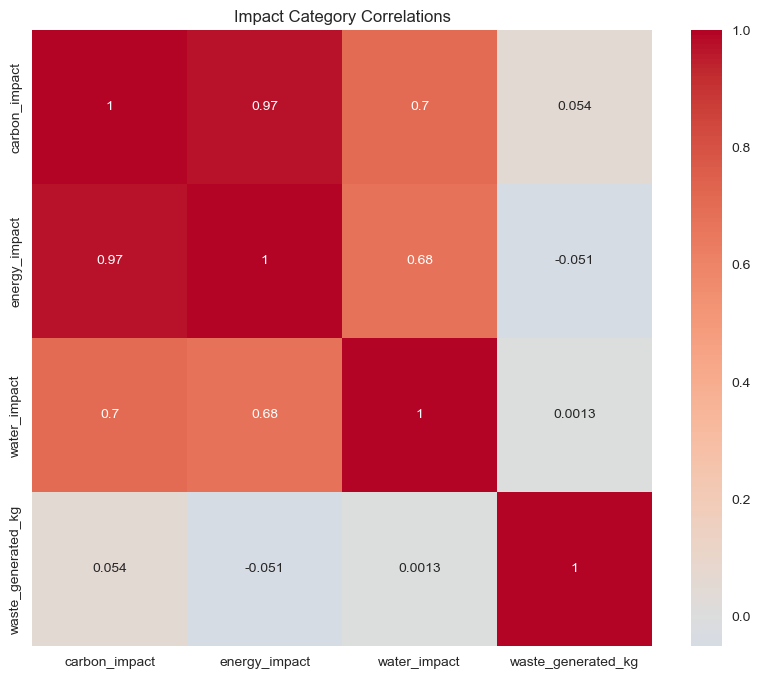

In [ ]:
# Plot impact correlations
fig = visualizer.plot_impact_correlation(impacts)
plt.show()

## 4. Advanced Analysis

Perform more advanced analysis using the calculator's features.

### Normalize Impacts

In [ ]:
# Normalize impacts for comparison
normalized_impacts = calculator.normalize_impacts(impacts)
print("Normalized Impacts:")
normalized_impacts.head()

Normalized Impacts:


,product_id,product_name,life_cycle_stage,material_type,quantity_kg,energy_consumption_kwh,transport_distance_km,waste_generated_kg,carbon_impact,energy_impact,water_impact,recycling_rate,landfill_rate,incineration_rate
0,P001,Reinforced Concrete,manufacturing,concrete,2500.0,120.0,50,125.0,0.518519,0.375728,1.000000,0.1,0.80,0.10
1,P001,Reinforced Concrete,transportation,concrete,2500.0,20.0,100,0.0,0.111111,0.074757,0.000000,0.0,0.00,0.00
2,P001,Reinforced Concrete,end-of-life,concrete,2500.0,50.0,30,2500.0,0.148148,0.004854,0.000333,0.1,0.80,0.10
3,P002,Structural Steel Beam,manufacturing,steel,500.0,300.0,200,25.0,1.000000,1.000000,0.500833,0.9,0.05,0.05
4,P002,Structural Steel Beam,transportation,steel,500.0,40.0,150,0.0,0.259259,0.246602,0.099900,0.0,0.00,0.00


### Compare Alternatives

In [ ]:
# Compare alternative products
comparison = calculator.compare_alternatives(impacts, ['P001', 'P002'])
print("Product Comparison:")
comparison 

Product Comparison:


,product_id,product_name,life_cycle_stage,material_type,quantity_kg,energy_consumption_kwh,transport_distance_km,waste_generated_kg,carbon_impact,energy_impact,water_impact,recycling_rate,landfill_rate,incineration_rate,carbon_impact_relative,energy_impact_relative,water_impact_relative
0,P001,Reinforced Concrete,manufacturing,concrete,2500.0,120.0,50,125.0,700.0,3870.0,150150.0,0.1,0.80,0.10,366.666667,12800.000000,inf
1,P001,Reinforced Concrete,transportation,concrete,2500.0,20.0,100,0.0,150.0,770.0,0.0,0.0,0.00,0.00,0.000000,2466.666667,NaN
2,P001,Reinforced Concrete,end-of-life,concrete,2500.0,50.0,30,2500.0,200.0,50.0,50.0,0.1,0.80,0.10,33.333333,66.666667,inf
3,P002,Structural Steel Beam,manufacturing,steel,500.0,300.0,200,25.0,1350.0,10300.0,75200.0,0.9,0.05,0.05,800.000000,34233.333333,inf
4,P002,Structural Steel Beam,transportation,steel,500.0,40.0,150,0.0,350.0,2540.0,15000.0,0.0,0.00,0.00,133.333333,8366.666667,inf
5,P002,Structural Steel Beam,end-of-life,steel,500.0,30.0,40,500.0,150.0,30.0,30.0,0.9,0.05,0.05,0.000000,0.000000,inf
